In [513]:
import pandas as pd
star_wars = pd.read_csv("starwars/starwars.csv", encoding="ISO-8859-1")

Rename "favorably/unfavorably" columns to its character names

In [514]:
star_wars.iloc[0:1, 15:29]

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda


In [515]:
star_wars = star_wars.rename(columns={
        "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": 
            "Han Solo",
        "Unnamed: 16": "Luke Skywalker",
        "Unnamed: 17": "Princess Leia Organa",
        "Unnamed: 18": "Anakin Skywalker",
        "Unnamed: 19": "Obi Wan Kenobi",
        "Unnamed: 20": "Emperor Palpatine",
        "Unnamed: 21": "Darth Vader",
        "Unnamed: 22": "Lando Calrissian",
        "Unnamed: 23": "Boba Fett",
        "Unnamed: 24": "C-3P0",
        "Unnamed: 25": "R2 D2",
        "Unnamed: 26": "Jar Jar Binks",
        "Unnamed: 27": "Padme Amidala",
        "Unnamed: 28": "Yoda"
})

Check the results

In [516]:
star_wars.iloc[0:1, 15:29]

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
0,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda


Remove rows where "RespondentID" is not a number

In [517]:
star_wars = star_wars[star_wars["RespondentID"].notnull()]

Convert Yes/No columns to boolean: 
* `Have you seen any of the 6 films in the Star Wars franchise?` 
* `Do you consider yourself to be a fan of the Star Wars film franchise?`

In [518]:
yes_no = {"Yes": True, "No": False}
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

Convert "Have you seen movie..." columns to True/False

In [519]:
import numpy as np

movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

Rename columns for seen episodes

In [520]:
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
})

Clean Up Movie Ranking Columns

In [521]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

Rename ranking columns

In [522]:
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
})

## The Highest Ranked Movie

<Container object of 6 artists>

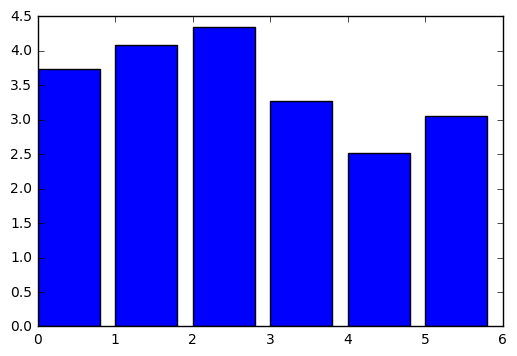

In [523]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())

Lower values of bars are better ranking episodes.  
So the 5-th movie "Star Wars: Episode V The Empire Strikes Back" is the most favourite.

## The Most Seen Movie

<Container object of 6 artists>

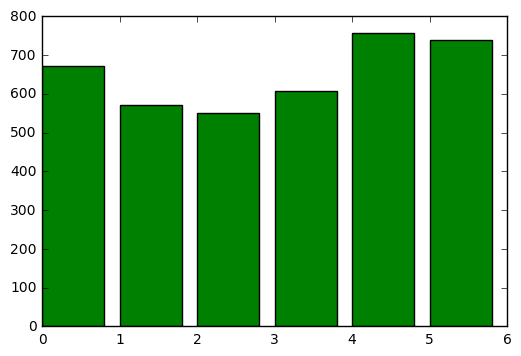

In [524]:
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum(), color='green')

Higher values of bars are most viewed episodes.
So the 5-th movie "Star Wars: Episode V The Empire Strikes Back" is the most viewed.  
It is strong correlation with most favourite movie.

# Gender Segments

In [525]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

## The Highest Ranked Movie by Males and Females

In [526]:
# Get some common plot configuration
episodes = ('Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI')
width = 0.35
def cute_labels(ax):
    ax.set_xticks(np.arange(6) + width)
    ax.set_xticklabels(episodes)
    for label in ax.xaxis.get_ticklabels():
        label.set_color('Maroon')
        label.set_rotation(25)
        label.set_fontsize(10)
    for line in ax.yaxis.get_ticklines():    
        line.set_markersize(3)
        line.set_markeredgewidth(1)

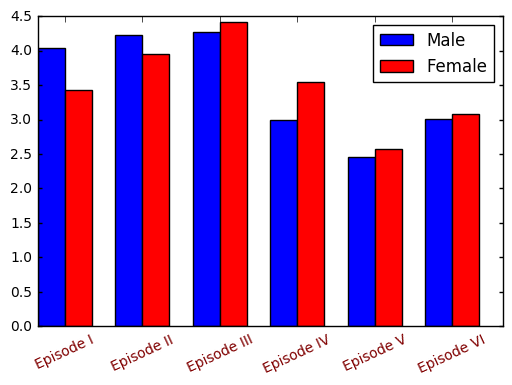

In [527]:
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(np.arange(6), males[males.columns[9:15]].mean(), width,  color = 'blue')
rects2 = ax.bar(np.arange(6) + width, females[females.columns[9:15]].mean(), width, color = 'red')
cute_labels(ax)    

plt.legend((rects1[0], rects2[0]), ('Male', 'Female'), loc='upper right')
plt.show()

Lower values of bars are better ranking episodes.  
The 5-th movie "Star Wars: Episode V The Empire Strikes Back" is the most favourite for both male and female groups.

## The Most Seen Movie by Males and Females

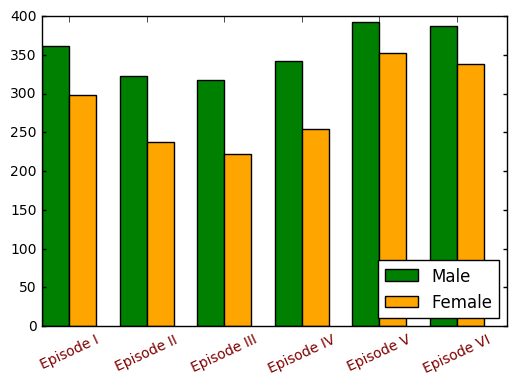

In [528]:
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(np.arange(6), males[males.columns[3:9]].sum(), width,  color = 'green')
rects2 = ax.bar(np.arange(6) + width, females[females.columns[3:9]].sum(), width, color = 'orange')
cute_labels(ax)
plt.legend((rects1[0], rects2[0]), ('Male', 'Female'), loc='lower right')
plt.show()

Higher values of bars are most viewed episodes.  
The 5-th movie "Star Wars: Episode V The Empire Strikes Back" is the most viewed by males and females.  
**Interesting thing:** Episodes I, II, III, IV are lower ranked by male, but it had seen almost same frequent like more higher ranked Episodes V, VI

# Star Wars Fan Segments

In [529]:
fld="Do you consider yourself to be a fan of the Star Wars film franchise?"
fan    = star_wars[star_wars[fld] == True]
notfan = star_wars[star_wars[fld] == False]

## The Highest Ranked Movie by Fans and not Fans

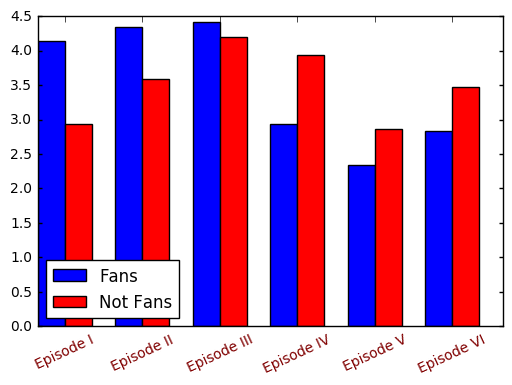

In [530]:
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(np.arange(6), fan[fan.columns[9:15]].mean(), width,  color = 'blue')
rects2 = ax.bar(np.arange(6) + width, notfan[notfan.columns[9:15]].mean(), width, color = 'red')
cute_labels(ax)    

plt.legend((rects1[0], rects2[0]), ('Fans', 'Not Fans'), loc='lower left')
plt.show()

Lower values of bars are better ranking episodes.  
The 5-th movie "Star Wars: Episode V The Empire Strikes Back" is the most favourite for both fan and not fan groups.

## The Most Seen Movie by Fans and not Fans

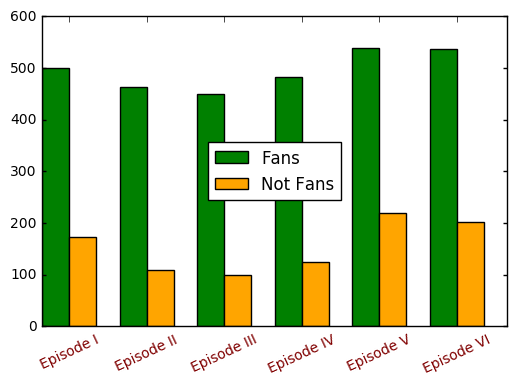

In [531]:
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(np.arange(6), fan[fan.columns[3:9]].sum(), width,  color = 'green')
rects2 = ax.bar(np.arange(6) + width, notfan[notfan.columns[3:9]].sum(), width, color = 'orange')
cute_labels(ax)
plt.legend((rects1[0], rects2[0]), ('Fans', 'Not Fans'), loc='center')
plt.show()

Higher values of bars are most viewed episodes.  
The 5-th movie "Star Wars: Episode V The Empire Strikes Back" is the most viewed by fans and not fans.  
**Interesting thing:** Episodes I, II, III, IV are lower ranked by fan, but it had seen almost same frequent like more higher ranked Episodes V, VI

# Star Treck Fan Segments

In [532]:
fld = "Do you consider yourself to be a fan of the Star Trek franchise?"
st_fan    = star_wars[star_wars[fld] == "Yes"]
st_notfan = star_wars[star_wars[fld] == "No"]

## The Highest Ranked Movie by Start Treck Fans and not Fans

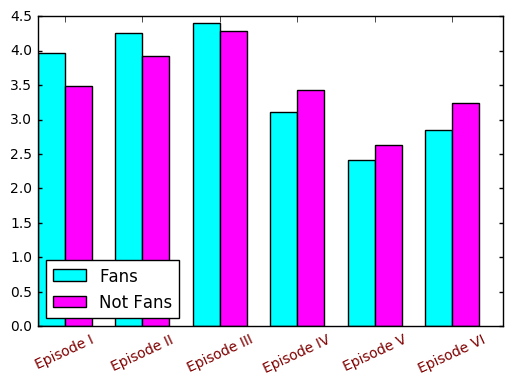

In [533]:
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(np.arange(6), st_fan[st_fan.columns[9:15]].mean(), width,  color = 'cyan')
rects2 = ax.bar(np.arange(6) + width, st_notfan[st_notfan.columns[9:15]].mean(), width, color = 'magenta')
cute_labels(ax)    

plt.legend((rects1[0], rects2[0]), ('Fans', 'Not Fans'), loc='lower left')
plt.show()

Lower values of bars are better ranking episodes.  
The 5-th movie "Star Wars: Episode V The Empire Strikes Back" is the most favourite for both Star Treck fan and not fan groups.

## The Most Seen Movie by Start Treck Fans and not Fans

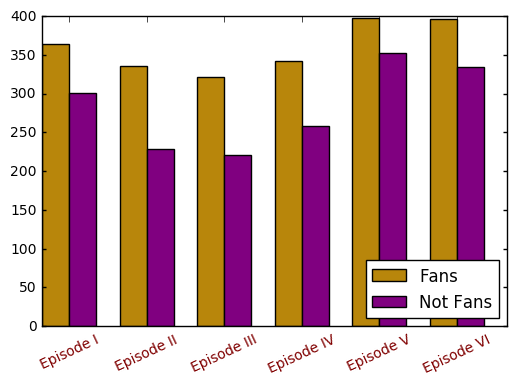

In [534]:
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(np.arange(6), st_fan[st_fan.columns[3:9]].sum(), width,  color = 'darkgoldenrod')
rects2 = ax.bar(np.arange(6) + width, st_notfan[st_notfan.columns[3:9]].sum(), width, color = 'purple')
cute_labels(ax)
plt.legend((rects1[0], rects2[0]), ('Fans', 'Not Fans'), loc='lower right')
plt.show()

Higher values of bars are most viewed episodes.  
The 5-th movie "Star Wars: Episode V The Empire Strikes Back" is the most viewed by Star Treck fans and not fans.  
**Interesting thing:** Episodes I, II, III, IV are lower ranked by fan, but it had seen almost same frequent like more higher ranked Episodes V, VI

# Segmentation of cinema viewers by education

Lets see kinds of education of the viewers  

In [535]:
star_wars["Education"].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [536]:
fld = "Education"
college          = star_wars[star_wars[fld] == "Some college or Associate degree"]
bachelors        = star_wars[star_wars[fld] == "Bachelor degree"]
graduates        = star_wars[star_wars[fld] == "Graduate degree"]
schoolers        = star_wars[star_wars[fld] == "High school degree"]
Less_than_school = star_wars[star_wars[fld] == "Less than high school degree"]

## The Highest Ranked Movie by education of cinema viewers

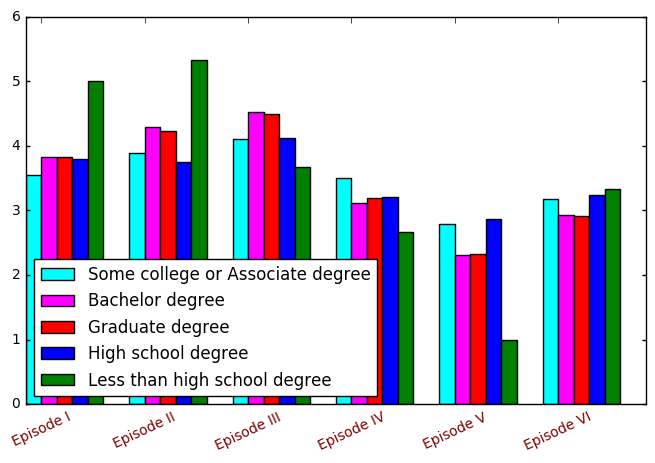

In [537]:
fig = plt.figure(figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
width = 0.15
rects1 = ax.bar(np.arange(6),           college[college.columns[9:15]].mean(), width,  color = 'cyan')
rects2 = ax.bar(np.arange(6) + width,   bachelors[bachelors.columns[9:15]].mean(), width, color = 'magenta')
rects3 = ax.bar(np.arange(6) + 2*width, graduates[graduates.columns[9:15]].mean(), width, color = 'red')
rects4 = ax.bar(np.arange(6) + 3*width, schoolers[schoolers.columns[9:15]].mean(), width, color = 'blue')
rects5 = ax.bar(np.arange(6) + 4*width, Less_than_school[Less_than_school.columns[9:15]].mean(), width, color = 'green')
cute_labels(ax)    
plt.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]), 
           ('Some college or Associate degree', 'Bachelor degree', 'Graduate degree', 
            'High school degree', 'Less than high school degree'), loc='lower left')
plt.show()

Lower values of bars are better ranking episodes.  
The 5-th movie "Star Wars: Episode V The Empire Strikes Back" is the most favourite for all education segments.

## The Most Seen Movie by education of cinema viewers

In [538]:
#It is need to remove segment "Less than school", because there are only 3 person from 7 viewed all of Episodes 
#and it is not interesting to see on plot 
Less_than_school[Less_than_school.columns[3:9]]

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
190,False,False,False,False,False,False
311,True,True,True,True,True,True
590,False,False,False,False,False,False
708,False,False,False,False,False,False
716,True,True,True,True,True,True
993,True,True,True,True,True,True
1179,False,False,False,False,False,False


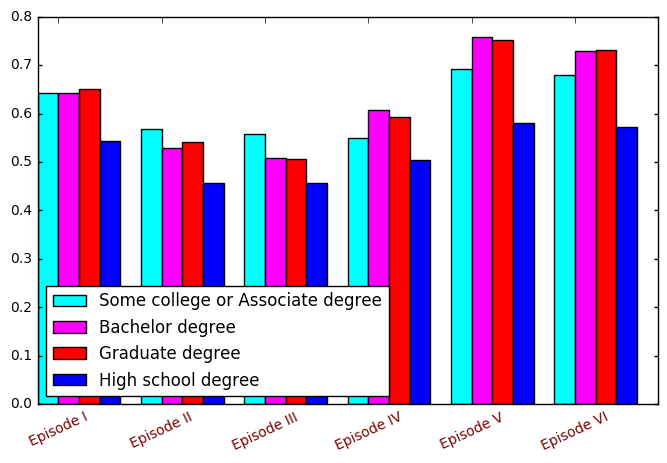

In [539]:
fig = plt.figure(figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
width = 0.20
rects1 = ax.bar(np.arange(6),           college[college.columns[3:9]].mean(), width,  color = 'cyan')
rects2 = ax.bar(np.arange(6) + width,   bachelors[bachelors.columns[3:9]].mean(), width, color = 'magenta')
rects3 = ax.bar(np.arange(6) + 2*width, graduates[graduates.columns[3:9]].mean(), width, color = 'red')
rects4 = ax.bar(np.arange(6) + 3*width, schoolers[schoolers.columns[3:9]].mean(), width, color = 'blue')
cute_labels(ax)    
plt.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]), 
           ('Some college or Associate degree', 'Bachelor degree', 'Graduate degree', 
            'High school degree'), loc='lower left')
plt.show()

Higher values of bars are most viewed episodes.
The 5-th movie "Star Wars: Episode V The Empire Strikes Back" is the most viewed.

# Segmentation of cinema viewers by location

Lets see kinds of location of the viewers  

In [540]:
star_wars["Location (Census Region)"].value_counts()

East North Central    181
Pacific               175
South Atlantic        170
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location (Census Region), dtype: int64

In [541]:
fld = "Location (Census Region)"
East_North         = star_wars[star_wars[fld] == "East North Central"]
Pacific            = star_wars[star_wars[fld] == "Pacific"]
South_Atlantic     = star_wars[star_wars[fld] == "South Atlantic"]
Middle_Atlantic    = star_wars[star_wars[fld] == "Middle Atlantic"]
West_South_Central = star_wars[star_wars[fld] == "West South Central"]
West_North_Central = star_wars[star_wars[fld] == "West North Central"]
Mountain           = star_wars[star_wars[fld] == "Mountain"]
New_England        = star_wars[star_wars[fld] == "New England"]
East_South_Central = star_wars[star_wars[fld] == "East South Central"]

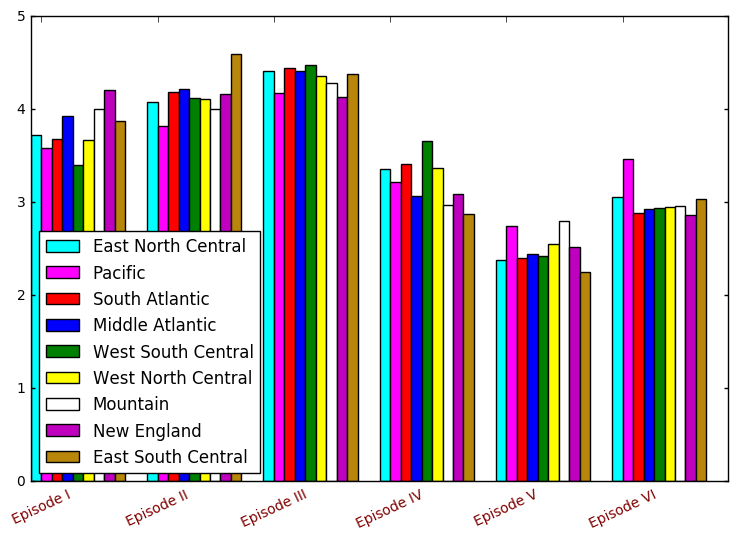

In [542]:
fig = plt.figure(figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
width = 0.09
rects1 = ax.bar(np.arange(6),           East_North[East_North.columns[9:15]].mean(), width,  color = 'cyan')
rects2 = ax.bar(np.arange(6) + width,   Pacific[Pacific.columns[9:15]].mean(), width, color = 'magenta')
rects3 = ax.bar(np.arange(6) + 2*width, South_Atlantic[South_Atlantic.columns[9:15]].mean(), width, color = 'red')
rects4 = ax.bar(np.arange(6) + 3*width, Middle_Atlantic[Middle_Atlantic.columns[9:15]].mean(), width, color = 'blue')
rects5 = ax.bar(np.arange(6) + 4*width, West_South_Central[West_South_Central.columns[9:15]].mean(), width, color = 'green')
rects6 = ax.bar(np.arange(6) + 5*width, West_North_Central[West_North_Central.columns[9:15]].mean(), width,  color = 'yellow')
rects7 = ax.bar(np.arange(6) + 6*width, Mountain[Mountain.columns[9:15]].mean(), width, color = 'white')
rects8 = ax.bar(np.arange(6) + 7*width, New_England[New_England.columns[9:15]].mean(), width, color = 'm')
rects9 = ax.bar(np.arange(6) + 8*width, East_South_Central[East_South_Central.columns[9:15]].mean(), width, color = 'darkgoldenrod')

cute_labels(ax)    
plt.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0], rects6[0], rects7[0], rects8[0], rects9[0]), 
           ('East North Central', 'Pacific', 'South Atlantic', 'Middle Atlantic', 'West South Central', 
           'West North Central', 'Mountain', 'New England', 'East South Central'), loc='lower left')
plt.show()

Lower values of bars are better ranking episodes.
The 5-th movie "Star Wars: Episode V The Empire Strikes Back" is the most favourite for all location segments.

## The Most Seen Movie by location of cinema viewers

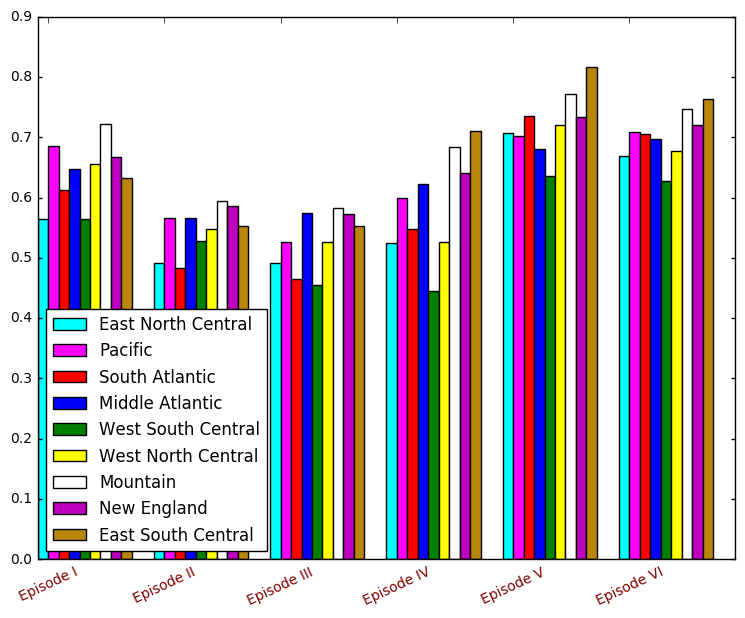

In [543]:
fig = plt.figure(figsize=(9, 7), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
width = 0.09
rects1 = ax.bar(np.arange(6),           East_North[East_North.columns[3:9]].mean(), width,  color = 'cyan')
rects2 = ax.bar(np.arange(6) + width,   Pacific[Pacific.columns[3:9]].mean(), width, color = 'magenta')
rects3 = ax.bar(np.arange(6) + 2*width, South_Atlantic[South_Atlantic.columns[3:9]].mean(), width, color = 'red')
rects4 = ax.bar(np.arange(6) + 3*width, Middle_Atlantic[Middle_Atlantic.columns[3:9]].mean(), width, color = 'blue')
rects5 = ax.bar(np.arange(6) + 4*width, West_South_Central[West_South_Central.columns[3:9]].mean(), width, color = 'green')
rects6 = ax.bar(np.arange(6) + 5*width, West_North_Central[West_North_Central.columns[3:9]].mean(), width,  color = 'yellow')
rects7 = ax.bar(np.arange(6) + 6*width, Mountain[Mountain.columns[3:9]].mean(), width, color = 'white')
rects8 = ax.bar(np.arange(6) + 7*width, New_England[New_England.columns[3:9]].mean(), width, color = 'm')
rects9 = ax.bar(np.arange(6) + 8*width, East_South_Central[East_South_Central.columns[3:9]].mean(), width, color = 'darkgoldenrod')

cute_labels(ax)    
plt.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0], rects6[0], rects7[0], rects8[0], rects9[0]), 
           ('East North Central', 'Pacific', 'South Atlantic', 'Middle Atlantic', 'West South Central', 
           'West North Central', 'Mountain', 'New England', 'East South Central'), loc='lower left')
plt.show()

Higher values of bars are most viewed episodes. The 5-th movie "Star Wars: Episode V The Empire Strikes Back" is the most viewed by any location.

# Which character shot first?

## Lets ask Star Wars Fans/not fans and Star Treck funs/not fans

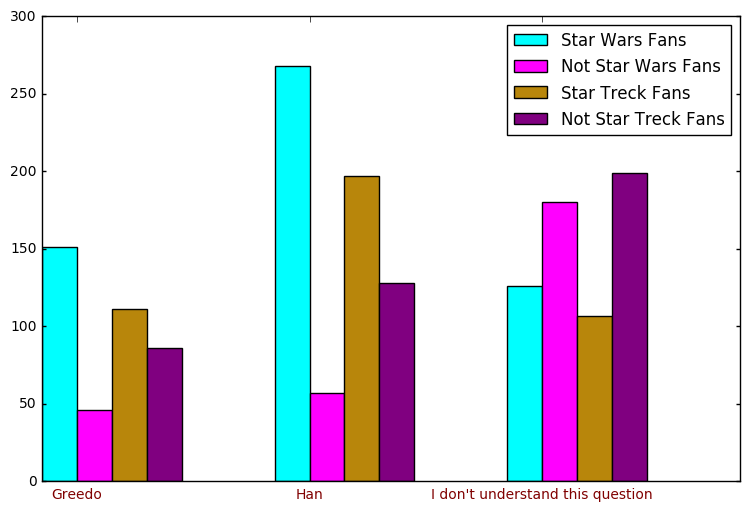

In [544]:
# get character shot first
fan_charshot       = fan['Which character shot first?'].value_counts()
notfan_charshot    = notfan['Which character shot first?'].value_counts()
st_fan_charshot    = st_fan['Which character shot first?'].value_counts()
st_notfan_charshot = st_notfan['Which character shot first?'].value_counts()

# make dataframe from series
df_fan_charshot       = fan_charshot.to_frame()
df_notfan_charshot    = notfan_charshot.to_frame()
df_st_fan_charshot    = st_fan_charshot.to_frame()
df_st_notfan_charshot = st_notfan_charshot.to_frame()
# make same order
df_fan_charshot.sort_index(axis=0, level=None, ascending=True, inplace=True)
df_notfan_charshot.sort_index(axis=0, level=None, ascending=True, inplace=True)
df_st_fan_charshot.sort_index(axis=0, level=None, ascending=True, inplace=True)
df_st_notfan_charshot.sort_index(axis=0, level=None, ascending=True, inplace=True)

width = 0.15

# Get some common plot configuration
def cute_labels2(ax, labels_count, xlabel_names, width, angle):
    ax.set_xticks(np.arange(labels_count) + width)
    ax.set_xticklabels(xlabel_names)
    for label in ax.xaxis.get_ticklabels():
        label.set_color('Maroon')
        label.set_rotation(angle)
        label.set_fontsize(10)
    for line in ax.yaxis.get_ticklines():    
        line.set_markersize(3)
        line.set_markeredgewidth(1)

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)
rects1 = ax.bar(np.arange(3), df_fan_charshot[df_fan_charshot.columns[0]], width,  color = 'cyan')
rects2 = ax.bar(np.arange(3) + width, df_notfan_charshot[df_notfan_charshot.columns[0]], width, color = 'magenta')
rects3 = ax.bar(np.arange(3) + 2*width, df_st_fan_charshot[df_st_fan_charshot.columns[0]], width,  color = 'darkgoldenrod')
rects4 = ax.bar(np.arange(3) + 3*width, df_st_notfan_charshot[df_st_notfan_charshot.columns[0]], width, color = 'purple')
cute_labels2(ax, 3, list(df_notfan_charshot.index.values), width, 0)    

plt.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('Star Wars Fans', 'Not Star Wars Fans', 'Star Treck Fans', 'Not Star Treck Fans'), loc='upper right')
plt.show()


One interesting thing - there are many people who sayd they are star wars fans and don't understand the question "Which character shot first?"

## Lets see answers of cinema viewers by education

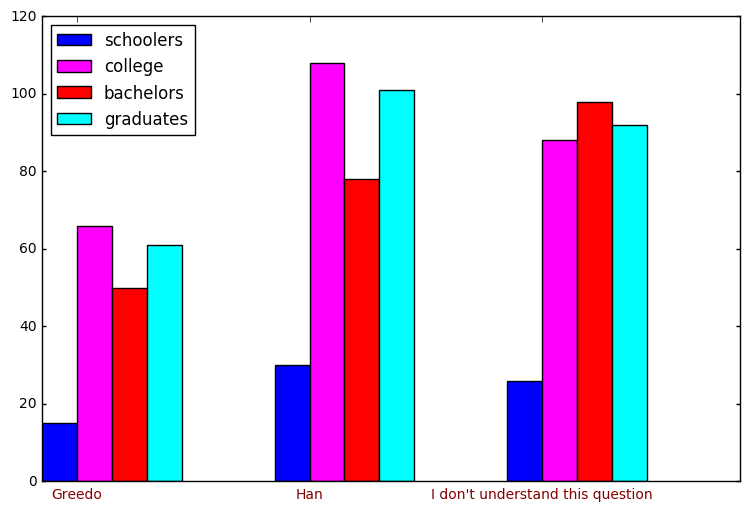

In [545]:
# get character shot first and make dataframe from series
df_college_charshot   = college['Which character shot first?'].value_counts().to_frame()
df_bachelors_charshot = bachelors['Which character shot first?'].value_counts().to_frame()
df_graduates_charshot = graduates['Which character shot first?'].value_counts().to_frame()
df_schoolers_charshot = schoolers['Which character shot first?'].value_counts().to_frame()

# make same order
df_college_charshot.sort_index(axis=0, level=None, ascending=True, inplace=True)
df_bachelors_charshot.sort_index(axis=0, level=None, ascending=True, inplace=True)
df_graduates_charshot.sort_index(axis=0, level=None, ascending=True, inplace=True)
df_schoolers_charshot.sort_index(axis=0, level=None, ascending=True, inplace=True)

'''rects1 = ax.bar(np.arange(6),           college[college.columns[3:9]].mean(), width,  color = 'cyan')
rects2 = ax.bar(np.arange(6) + width,   bachelors[bachelors.columns[3:9]].mean(), width, color = 'magenta')
rects3 = ax.bar(np.arange(6) + 2*width, graduates[graduates.columns[3:9]].mean(), width, color = 'red')
rects4 = ax.bar(np.arange(6) + 3*width, schoolers[schoolers.columns[3:9]].mean(), width, color = 'blue')'''

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111)
rects1 = ax.bar(np.arange(3),           df_schoolers_charshot[df_schoolers_charshot.columns[0]],   width, color = 'blue')
rects2 = ax.bar(np.arange(3) + width,   df_bachelors_charshot[df_bachelors_charshot.columns[0]], width, color = 'magenta')
rects3 = ax.bar(np.arange(3) + 2*width, df_graduates_charshot[df_graduates_charshot.columns[0]], width, color = 'red')
rects4 = ax.bar(np.arange(3) + 3*width, df_college_charshot[df_college_charshot.columns[0]], width, color = 'cyan')
cute_labels2(ax, 3, list(df_notfan_charshot.index.values), width, 0)    

plt.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('schoolers', 'college', 'bachelors', 'graduates'), loc='upper left')
plt.show()

Obviously bachelors has most misunderstanding of the question.

# Characters Rank

Befor ranking characters and summarize rankings we need to convert this ranking text surveys into number values.  
The example of text ranking kinds:

In [546]:
star_wars[star_wars.columns[17]].value_counts()

Very favorably                                 547
Somewhat favorably                             210
Neither favorably nor unfavorably (neutral)     48
Somewhat unfavorably                            12
Unfamiliar (N/A)                                 8
Very unfavorably                                 6
Name: Princess Leia Organa, dtype: int64

It will better to change Highest values to pisitive numbers and Lowest values to negative numbers and neutral to zero.  
Number ranking will be balanced - neutral is zero points, most liked is +2 and most disliked is -2.

In [547]:
ranging_likes_dislikes = {
    "Very favorably"                             : 2, 
    "Somewhat favorably"                         : 1,
    "Neither favorably nor unfavorably (neutral)": 0,
    "Unfamiliar (N/A)"                           : 0,
    "Somewhat unfavorably"                       :-1,
    "Very unfavorably"                           :-2
}
for hero in star_wars.columns[15:29]:
    star_wars[hero] = star_wars[hero].map(ranging_likes_dislikes)

In [548]:
most_liked_character = star_wars[star_wars.columns[15:29]].sum().to_frame().sort_values([0], axis=0, ascending=True, inplace=False)
most_liked_character

,0
Jar Jar Binks,-156.0
Emperor Palpatine,47.0
Boba Fett,243.0
Darth Vader,391.0
Padme Amidala,393.0
Lando Calrissian,428.0
Anakin Skywalker,598.0
C-3P0,1140.0
Princess Leia Organa,1280.0
R2 D2,1287.0


In [549]:
most_liked_character_names = most_liked_character.index.tolist()

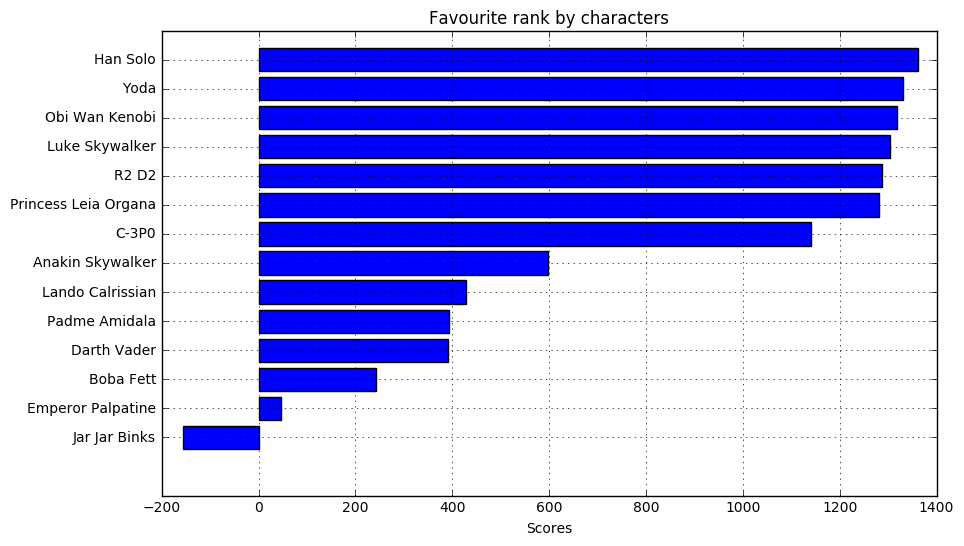

In [550]:
fig = plt.figure(figsize=(10, 6))
fig.add_subplot(111)
plt.barh(np.arange(14), most_liked_character[0], align='center')
plt.yticks(np.arange(14), list(most_liked_character.index.values))
plt.xlabel('Scores')
plt.title('Favourite rank by characters')
plt.grid(True)

As we can see  
*Most liked character* is **Han Solo**   
*Most disliked character* is **Jar Jar Binks**

### And which character creates the most controversy?

lets count numbers of likes (positive) and dislikes (negative)

In [562]:
characters_table = star_wars[star_wars.columns[15:29]]
character_neg_table = (characters_table[characters_table < 0].count()*(-1)).to_frame()
character_pos_table = characters_table[characters_table > 0].count().to_frame()

lets see the plot

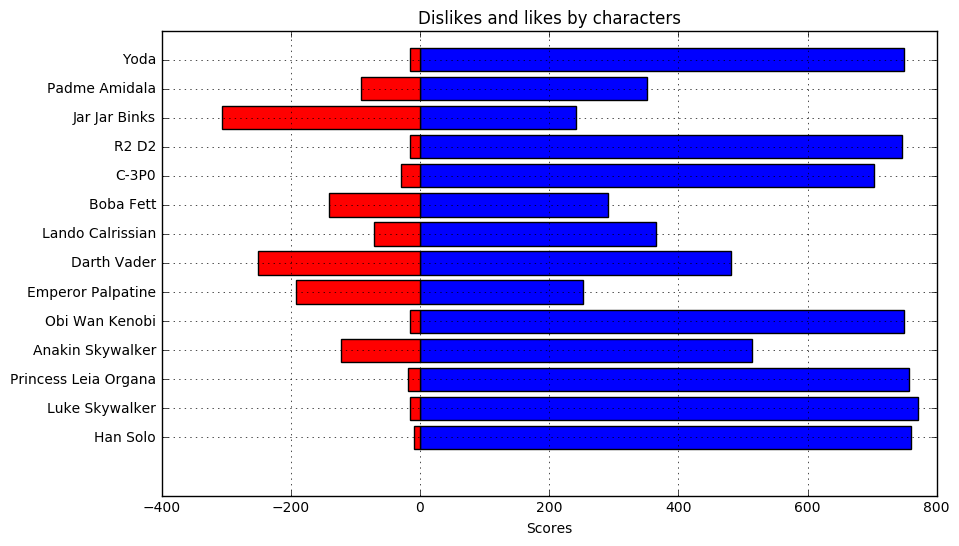

In [565]:
fig = plt.figure(figsize=(10, 6))
fig.add_subplot(111)
plt.barh(np.arange(14), character_pos_table[0], color='blue',  align='center')
plt.barh(np.arange(14), character_neg_table[0], color='red', align='center')
plt.yticks(np.arange(14), list(character_pos_table.index.values))
plt.xlabel('Scores')
plt.title('Dislikes and likes by characters')
plt.grid(True)

The most controversy characters must have similar counts of likes and dislikes, these are:  
- Emperor Palpatine
- Jar Jar Binks